# Churn Prediction in Telecom Industry

If you have a look at the European Business review statistics, it is mindblowing that telecommunication providers lose almost $65 million a month from customer churn which is way tooo expensive. It also contributes to one of the biggest problem in the industry.

This project tries to predict churn in the telecom industry.

## Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, fbeta_score, f1_score, classification_report)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
import category_encoders as ce

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading the dataset

In [5]:
df = pd.read_csv(r'C:\Users\user\Desktop\__PYTHON__\Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The TotalCharges column is an object type which is not supposed to be. I'll be converting it to a numeric type.

In [9]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Summary of the non-null columns in the dataset

In [11]:
null = df.isnull().sum().sort_values(ascending=False)
n1 = df.isnull().sum()/df.isnull().count()*100
n2 = (np.round(n1, 1)).sort_values(ascending=False)
missing_val = pd.concat([null, n2], axis=1, keys=['Total null', 'Percent(%)'])
missing_val

,Total null,Percent(%)
TotalCharges,11,0.2
customerID,0,0.0
DeviceProtection,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


#### A quick viz of the dataset's categorical columns

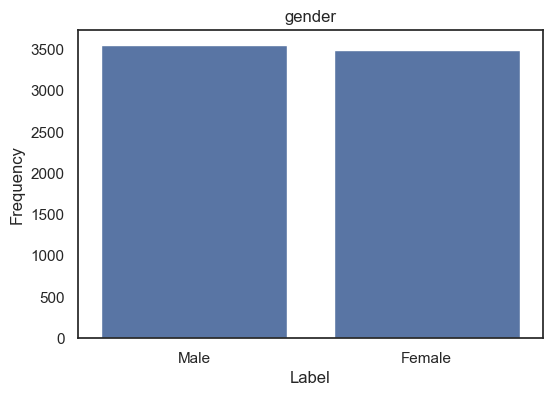

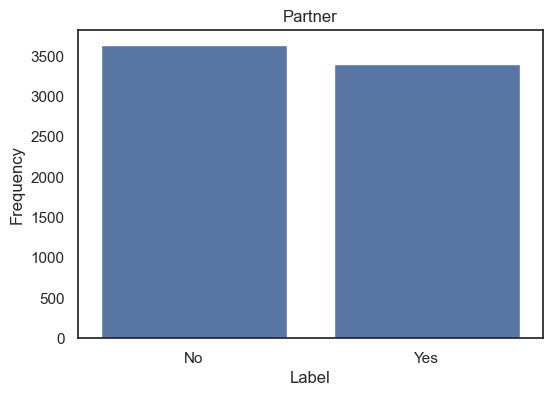

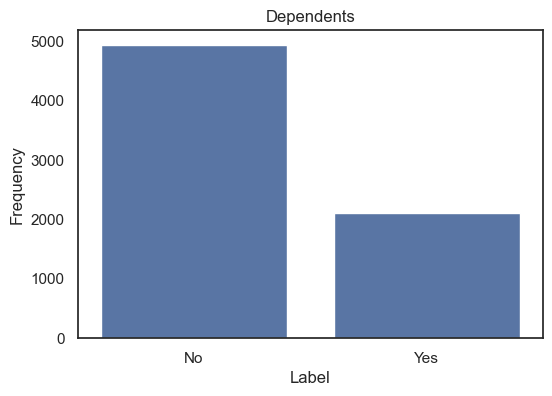

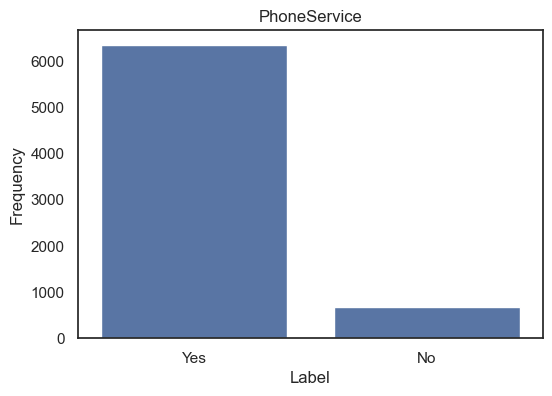

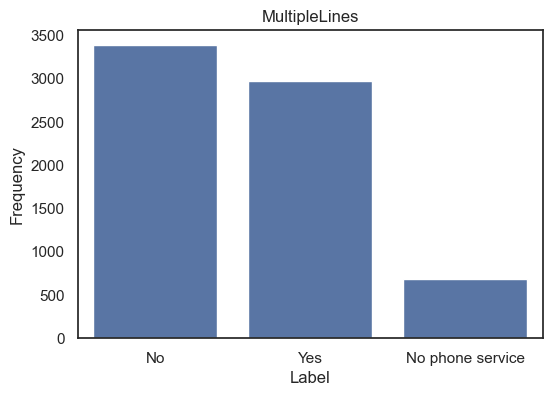

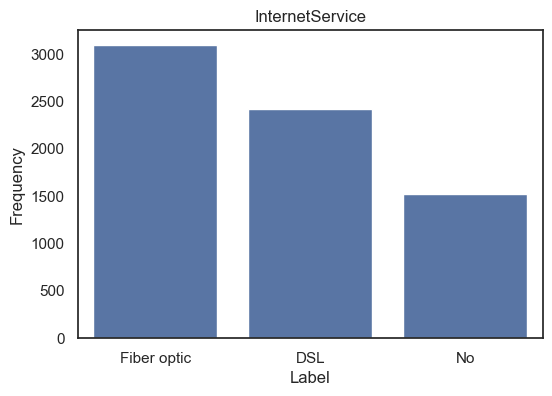

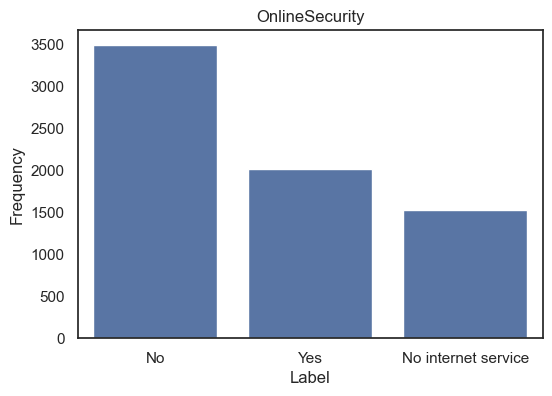

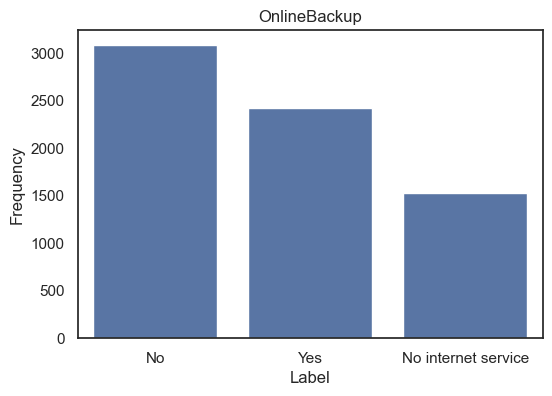

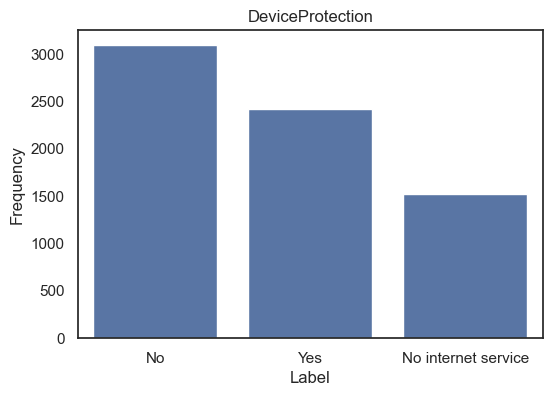

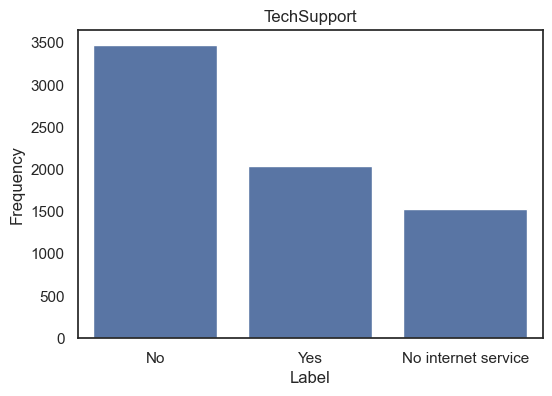

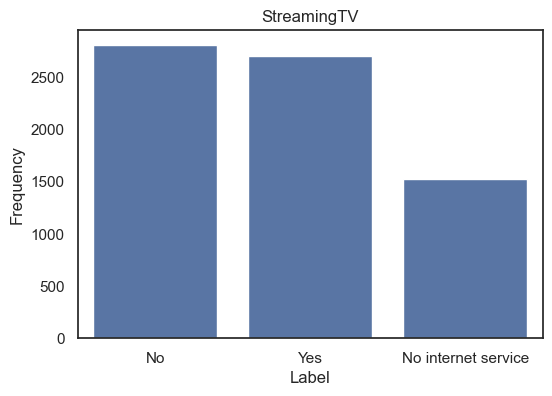

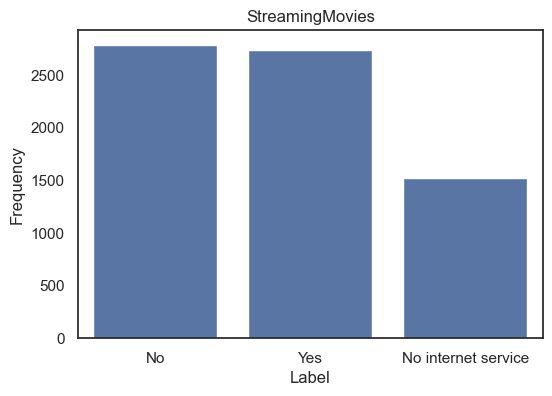

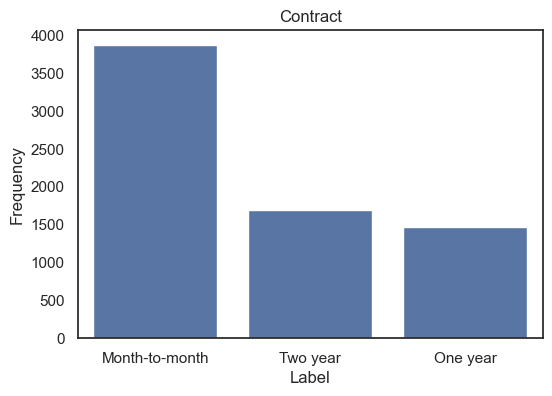

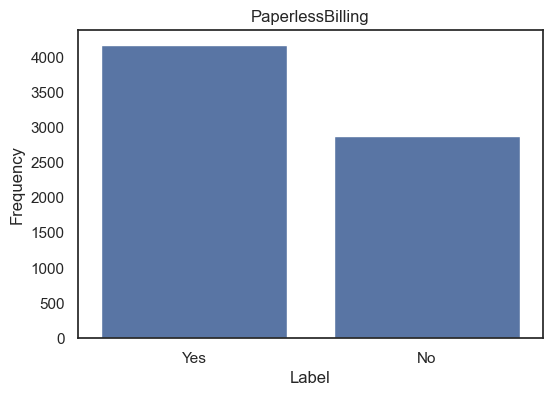

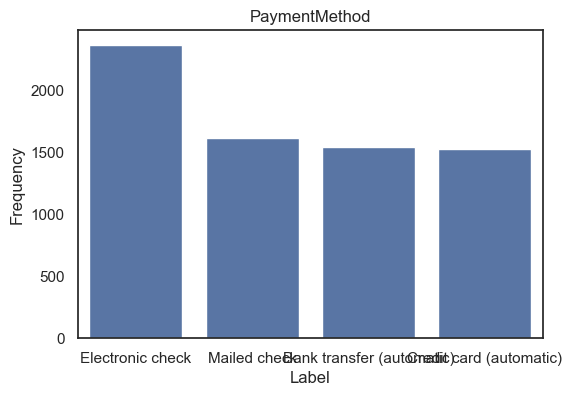

In [12]:
review = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
for i in review.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=review[i].value_counts().index, y=review[i].value_counts()).set(title=i, xlabel='Label', ylabel='Frequency')
    plt.show()

## Further Analysis

### Churn

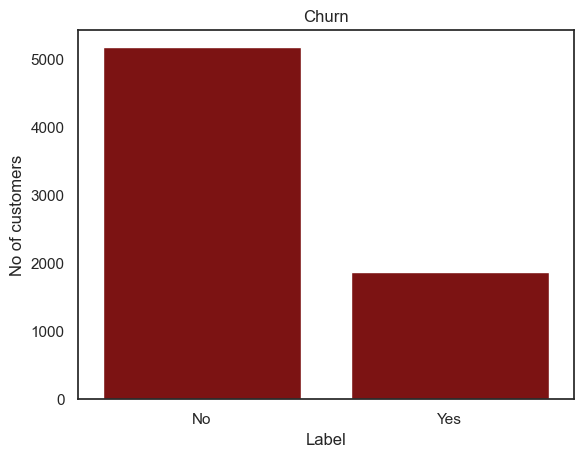

In [13]:
colors = ['#8e0201', '#e8cccc']
sns.countplot(x=df['Churn'], color=colors[0])
plt.title('Churn')
plt.xlabel('Label')
plt.ylabel('No of customers')
plt.show();

Majority of customers experienced a negative churn

#### Churn based on Gender

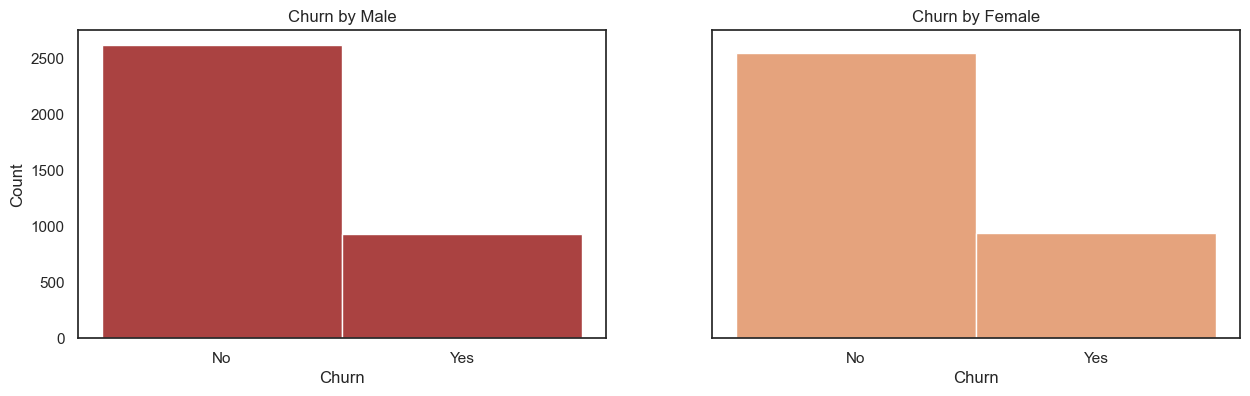

In [14]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(15,4))

ax = sns.histplot(df[df['gender']=='Male']['Churn'], kde=False, color='#8e0201', ax=ax1)
ax.set_title('Churn by Male')
ax = sns.histplot(df[df['gender']=='Female']['Churn'], kde=False, color=sns.color_palette()[1], ax=ax2)
ax.set_title('Churn by Female');

### Gender

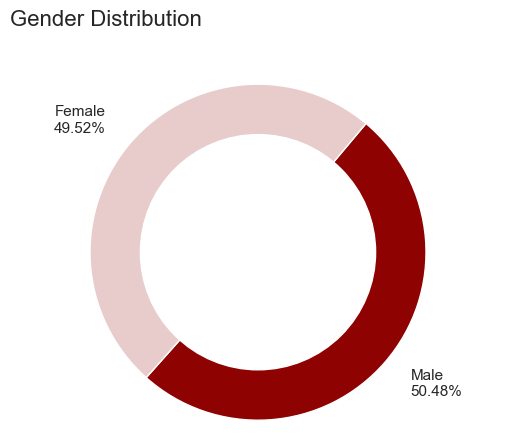

In [15]:
counts = df['gender'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['Male\n50.48%', 'Female\n49.52%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Gender Distribution', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

From the above, the majority of the customers is seen to be Male. 

### Partner

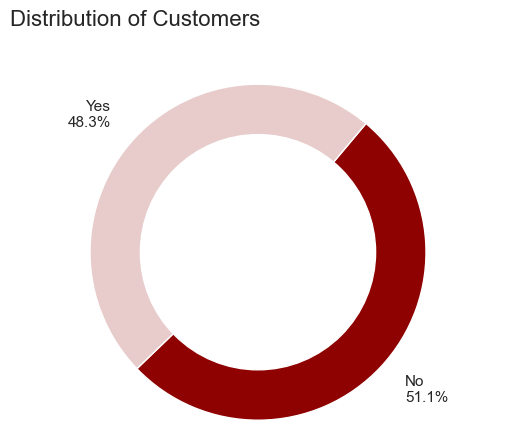

In [16]:
counts = df['Partner'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['No\n51.1%', 'Yes\n48.3%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Customers', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers have no partners. (51.7%)

### Senior Citizen

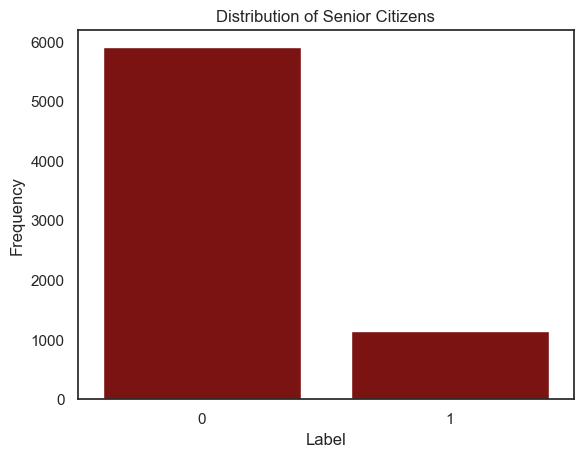

In [17]:
colors = ['#8e0201', '#e8cccc']
sns.countplot(data=df, x='SeniorCitizen', color=colors[0]).set(title='Distribution of Senior Citizens', xlabel='Label', ylabel='Frequency')
plt.show();

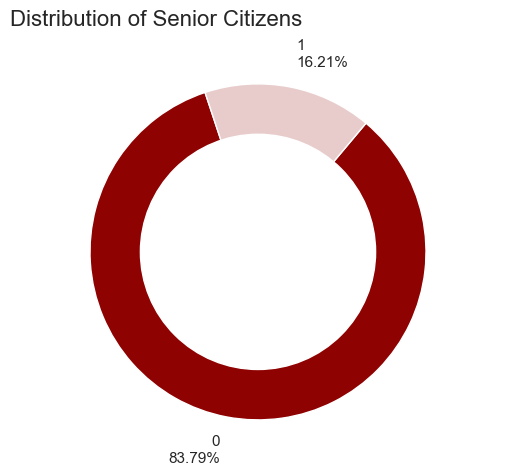

In [18]:
counts = df['SeniorCitizen'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['0\n83.79%', '1\n16.21%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Senior Citizens', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

16.21% (1142) of the customers were younger citizens while 83.79% (5901) were Senior Citizens

### Dependents

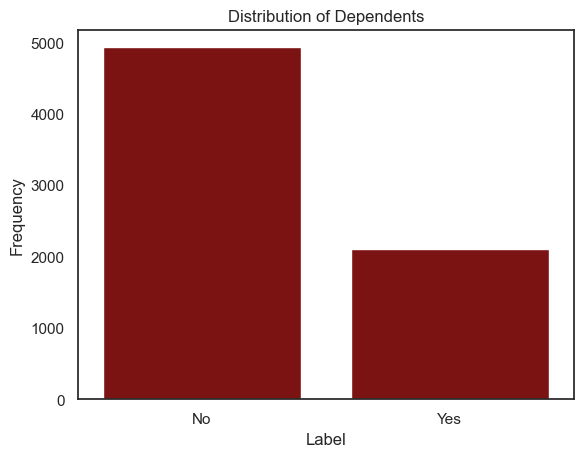

In [19]:
colors = ['#8e0201', '#e8cccc']
sns.countplot(data=df, x='Dependents', color=colors[0]).set(title='Distribution of Dependents', xlabel='Label', ylabel='Frequency')
plt.show();

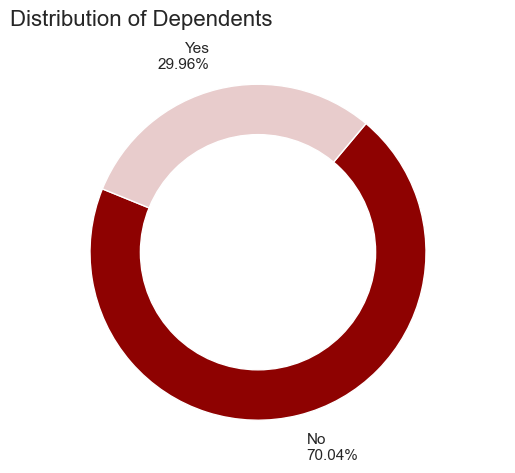

In [20]:
counts = df['Dependents'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['No\n70.04%', 'Yes\n29.96%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Dependents', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Few of the customers actually have dependents

### Customer Services

In [21]:
def get_colors(num_wedges):
    if num_wedges == 2:
        return ['#8e0201', '#c93432']  # Two colors
    elif num_wedges == 3:
        return ['#8e0201', '#c93432', '#e8cccc']  # Three colors
    elif num_wedges == 4:
        return ['#8e0201', '#c93432', '#e8cccc', '#e8cccc']  # Four colors
    else:
        # Handle cases with more than four wedges (add more colors as needed)
        return ['#FFC107', '#2196F3', '#4CAF50', '#FF5722', '#9C27B0', '#00BCD4', '#FFEB3B', '#795548']

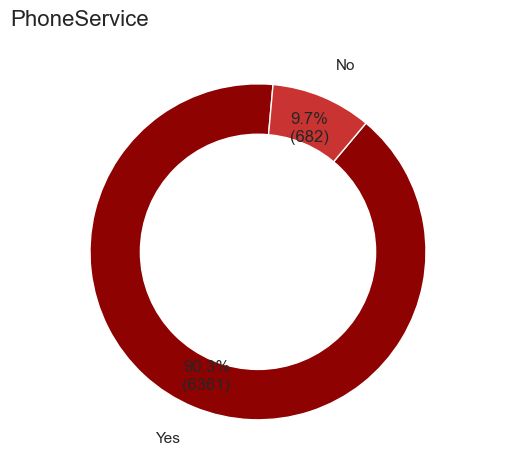

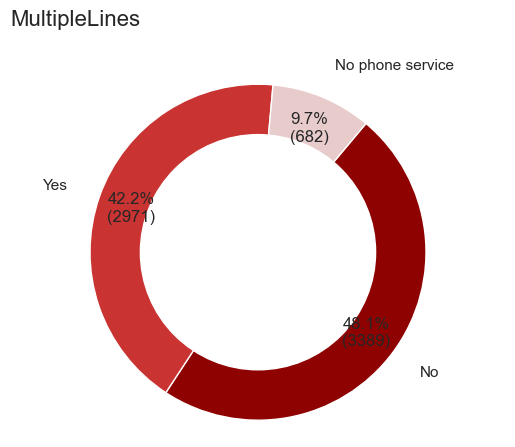

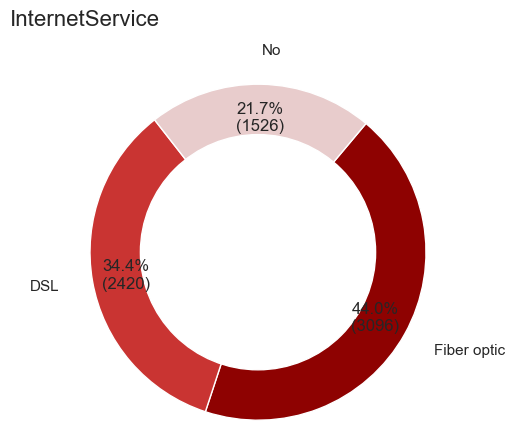

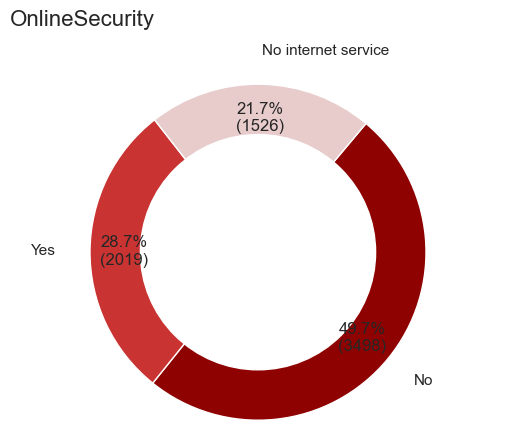

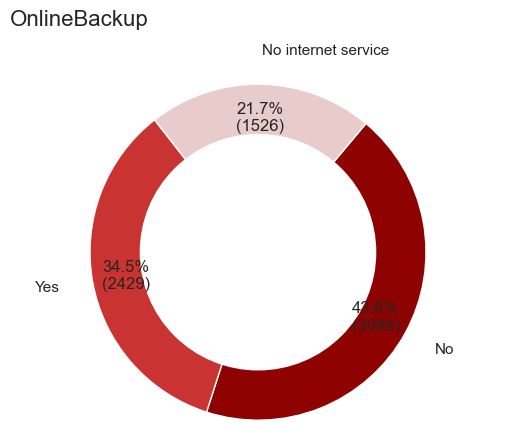

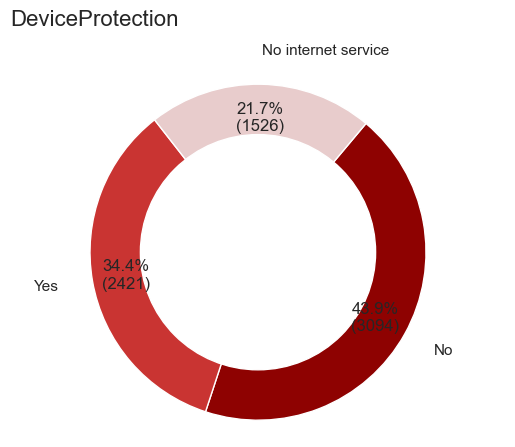

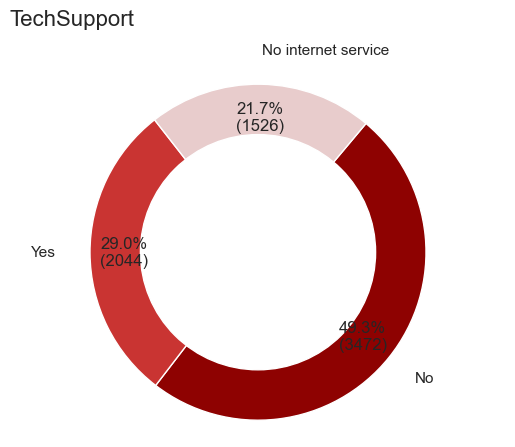

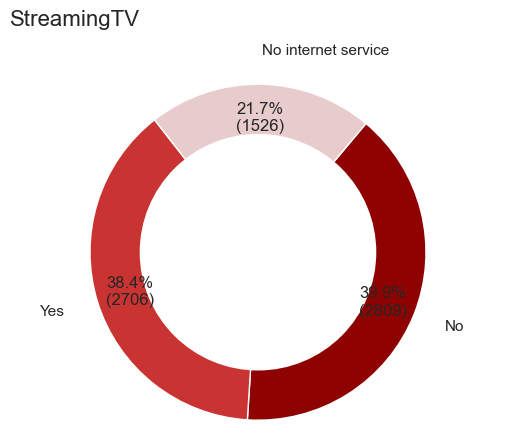

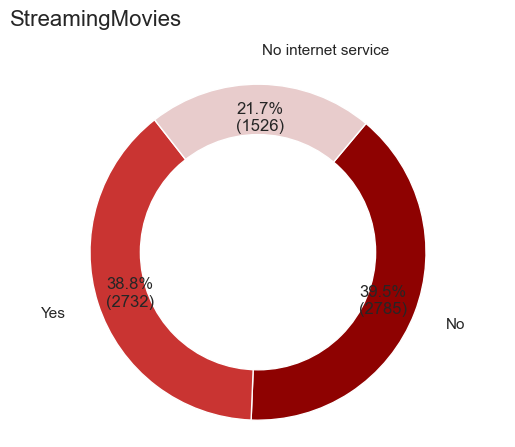

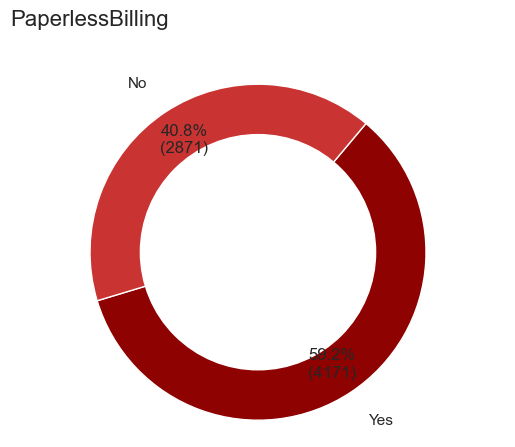

In [22]:
def func(pct, allvalues):
    abs = int(pct/100.*np.sum(allvalues))
    return '{:.1f}%\n({:d})'.format(pct, abs)

review = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]
for i in review.columns:
    fig, ax = plt.subplots()
    num_wedges = len(review[i].value_counts())
    colors = get_colors(num_wedges)
    ax.pie(x=review[i].value_counts(), labels=review[i].value_counts().index, colors=colors, startangle=50, counterclock=False, 
           pctdistance=0.8, labeldistance=1.2, autopct=lambda pct: func(pct, review[i].value_counts().values))
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    ax.set_title(i, fontsize = 16, loc='left', pad=30)
    ax.axis('equal')
    plt.show()

### Contract

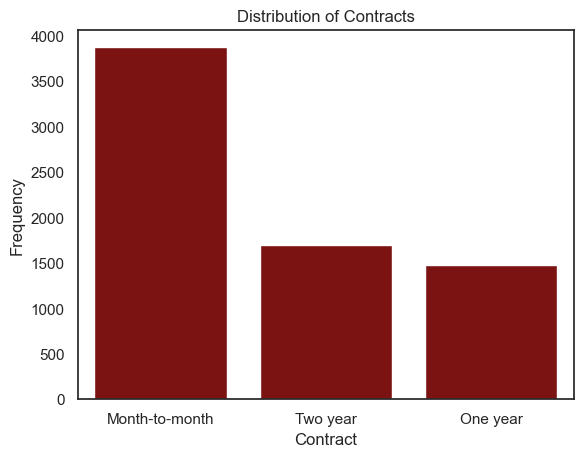

In [24]:
colors = ['#8e0201', '#c93432', '#e8cccc']
palette = sns.set_palette(sns.color_palette(colors))
order = df.Contract.value_counts().index
sns.countplot(data=df, x='Contract', order=order, palette=palette).set(title='Distribution of Contracts',
                                                                        xlabel='Contract', ylabel='Frequency')
plt.show();

The `Month-to-month` is the contractual situation of most customers

#### Contract based on Tenure

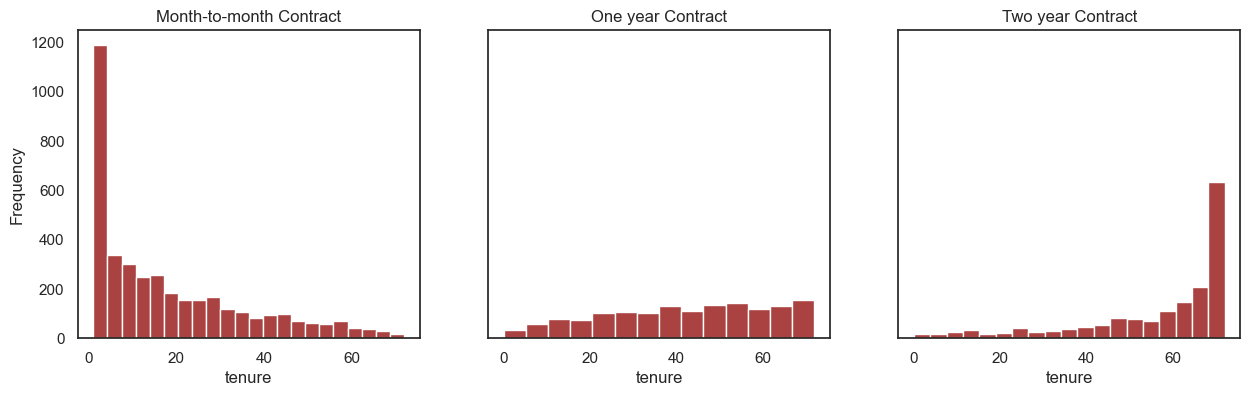

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(15,4))

ax = sns.histplot(df[df['Contract']=='Month-to-month']['tenure'], kde=False, color = '#8e0201', ax=ax1)
ax.set_ylabel('Frequency')
ax.set_title('Month-to-month Contract')
ax = sns.histplot(df[df['Contract']=='One year']['tenure'], kde=False, color = '#8e0201', ax=ax2)
ax.set_ylabel('Frequency')
ax.set_title('One year Contract')
ax = sns.histplot(df[df['Contract']=='Two year']['tenure'], kde=False, color = '#8e0201', ax=ax3)
ax.set_ylabel('Frequency')
ax.set_title('Two year Contract')
plt.show();

#### Contract based on Churn

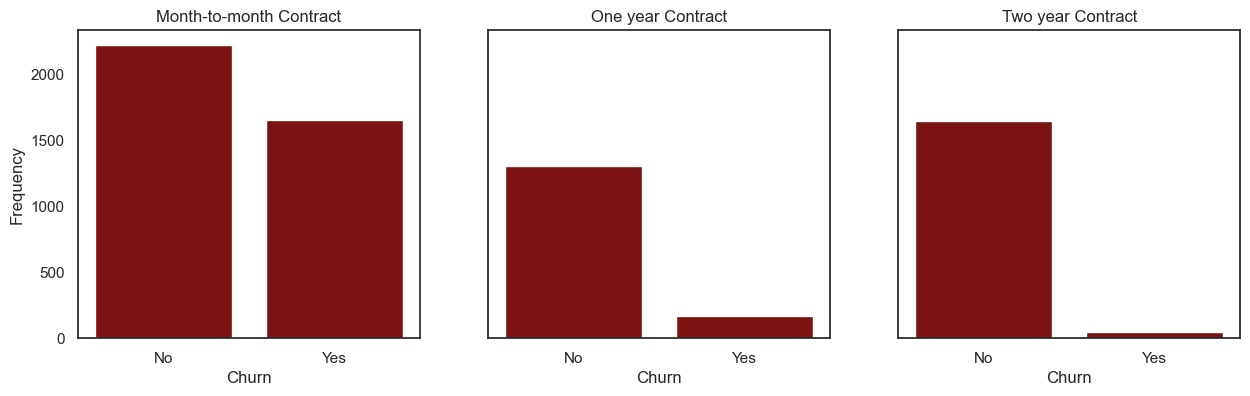

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(15,4))

ax = sns.countplot(x=df[df['Contract']=='Month-to-month']['Churn'], color='#8e0201', ax=ax1)
ax.set_ylabel('Frequency')
ax.set_title('Month-to-month Contract')
ax = sns.countplot(x=df[df['Contract']=='One year']['Churn'], color='#8e0201', ax=ax2)
ax.set_ylabel('Frequency')
ax.set_title('One year Contract')
ax = sns.countplot(x=df[df['Contract']=='Two year']['Churn'], color='#8e0201', ax=ax3)
ax.set_ylabel('Frequency')
ax.set_title('Two year Contract')
plt.show();

#### Contract based on Gender

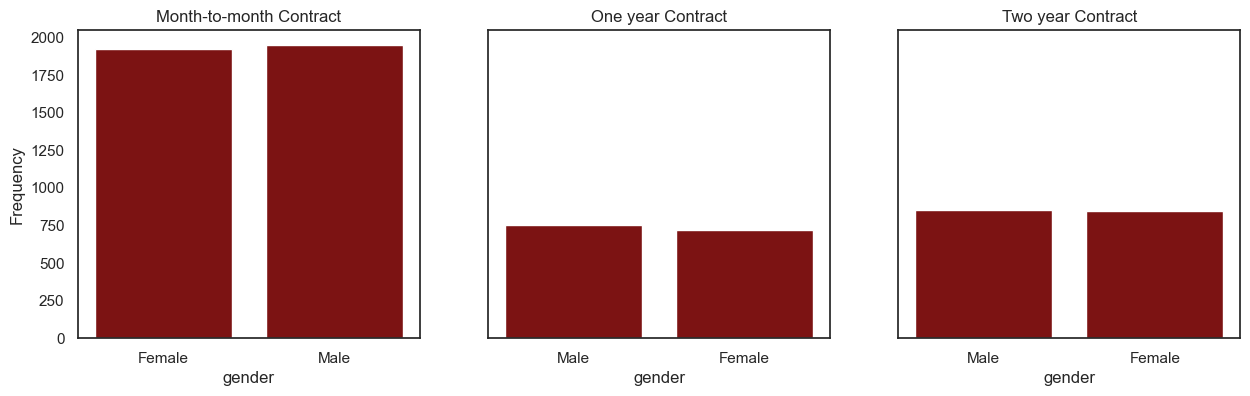

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(15,4))

ax = sns.countplot(x=df[df['Contract']=='Month-to-month']['gender'], color='#8e0201', ax=ax1)
ax.set_ylabel('Frequency')
ax.set_title('Month-to-month Contract')
ax = sns.countplot(x=df[df['Contract']=='One year']['gender'], color='#8e0201', ax=ax2)
ax.set_ylabel('Frequency')
ax.set_title('One year Contract')
ax = sns.countplot(x=df[df['Contract']=='Two year']['gender'], color='#8e0201', ax=ax3)
ax.set_ylabel('Frequency')
ax.set_title('Two year Contract')
plt.show();

### Charges

The charges consists of the Monthly Charges and the Total Charges

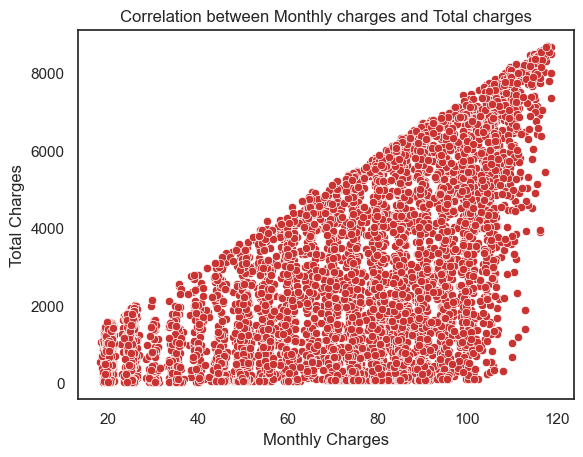

In [28]:
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'], color='#c93432')
plt.title('Correlation between Monthly charges and Total charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show();

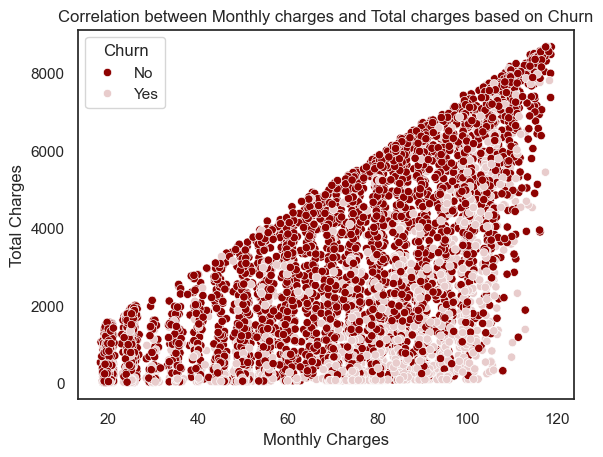

In [29]:
colors = ['#8e0201', '#e8cccc']
palette = sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette=palette)
plt.title('Correlation between Monthly charges and Total charges based on Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show();

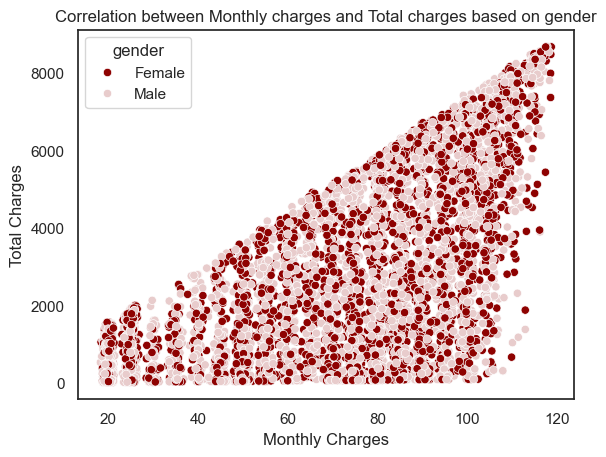

In [30]:
colors = ['#8e0201', '#e8cccc']
palette = sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='gender', palette=palette)
plt.title('Correlation between Monthly charges and Total charges based on gender')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show();

### Payment Methods

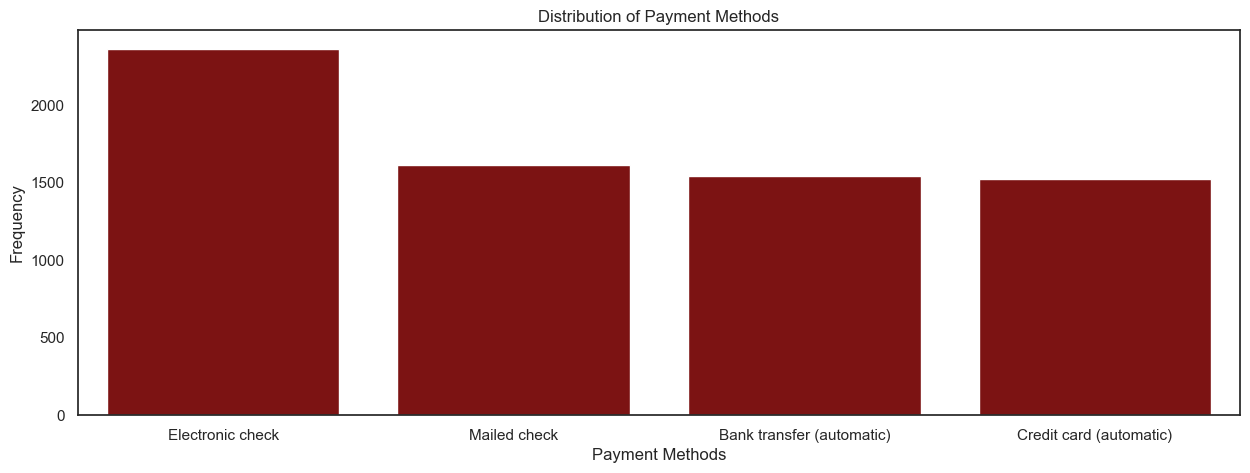

In [31]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PaymentMethod', color='#8e0201')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Methods')
plt.ylabel('Frequency')
plt.show();

The `electronic check` is the most common method of payment

#### Testing Numerical Features With ANOVA

In [32]:
print('The categorical features are:\n {}'.format(df.select_dtypes(include='object').columns.tolist()))
print('The numerical features are:\n {}'.format(df.select_dtypes(include='number').columns.tolist()))

The categorical features are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
The numerical features are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


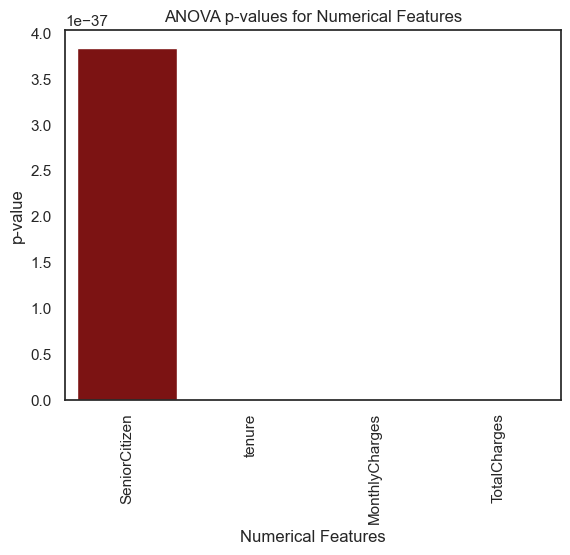

In [33]:
from scipy.stats import f_oneway

# Numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Perform ANOVA and calculate p-value for each numerical feature
p_values = {}
for feature in numerical_features:
    groups = df.groupby('Churn')[feature].apply(list)
    f_value, p_value = f_oneway(*groups)
    p_values[feature] = p_value

# Visualize the p-values among the numerical features
sns.barplot(x=list(p_values.keys()), y=list(p_values.values()))
plt.xticks(rotation=90)
plt.xlabel('Numerical Features')
plt.ylabel('p-value')
plt.title('ANOVA p-values for Numerical Features')
plt.show()

In [ ]:
# remove columns with high p-values from ANOVA test
# anova_drop = ['SeniorCitizen']
# df = df.drop(anova_drop, axis=1)

## Model Training

### Creating Training and Testing Sets

In [162]:
# get input and output data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [163]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**The goal is to prioritize identifying "Yes" cases, even though the "No" churn cases are numerous, the primary goal in this imbalanced dataset is to accurately predict "Yes" churn cases. Thsese are the customers at the risk of leavingnand identifying tehem proactively allows for targeted retention efforts.**

In [165]:
X_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_1,gender_2,Partner_1,Partner_2,Dependents_1,Dependents_2,...,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4
0,-0.439916,-1.277445,-1.160323,-0.994242,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,-0.439916,0.066327,-0.259629,-0.173244,0,1,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
2,-0.439916,-1.236724,-0.362660,-0.959674,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
3,-0.439916,0.514251,-0.746535,-0.194766,0,1,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
4,-0.439916,-1.236724,0.197365,-0.940470,1,0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0


In [164]:
# Converting categorical variables to numeric data
cat_pipeline = Pipeline(
    steps=[
        # ('impute', SimpleImputer(strategy='most_frequent')),
        ('one-hot encoding', ce.OneHotEncoder()),
        # ('target encoding', ce.TargetEncoder())
    ]
)

# Scaling numerical features and filling missing values
num_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='median')),
          ('scale', StandardScaler())]
)

# Numerical and categorical feature names
cat_cols = X.select_dtypes(exclude=np.number).columns
num_cols = X.select_dtypes(include=np.number).columns
print('Categorical columns:\n', cat_cols);print()
print('Numeric columns:\n',num_cols)

# Combining the two pipelines with a column transformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_cols),
        ('categorical', cat_pipeline, cat_cols)
    ]
)

# encode the target label
le = LabelEncoder()
y = le.fit_transform(y)

# get mapping for each label
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('\n', le_name_mapping)

# Fitting the pipeline
X_ = full_pipeline.fit_transform(X, y)

# Get column names after one-hot encoding
ohe_cols = full_pipeline.named_transformers_['categorical'].get_feature_names_out()
all_cols = np.concatenate([num_cols, ohe_cols])

# Create DataFrame with correct column names
X_df = pd.DataFrame(X_, columns=all_cols).astype({col: 'int64' for col in ohe_cols})

# # Create DataFrames with correct column names
# X_df = pd.DataFrame(X_, columns=X.columns)
X_df.info()

Categorical columns:
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Numeric columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

 {'No': 0, 'Yes': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SeniorCitizen       7043 non-null   float64
 1   tenure              7043 non-null   float64
 2   MonthlyCharges      7043 non-null   float64
 3   TotalCharges        7043 non-null   float64
 4   gender_1            7043 non-null   int64  
 5   gender_2            7043 non-null   int64  
 6   Partner_1           7043 non-null   int64  
 7   Partner_2

### Baseline Models

In [188]:
X_train, X_test, y_train, y_test= train_test_split(X_df, y, stratify=y, random_state=101, test_size=0.3)

In [189]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4930, 45) (4930,)
(2113, 45) (2113,)


In [190]:
# train a dummy classifier
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)

# generate predictions
y_pred_dummy = dummy_clf.predict(X_test)

# logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [193]:
# f2 score for dummy classifier (baseline model 1)
f2_score_classes = fbeta_score(y_test, y_pred_dummy, beta=2, average=None)

# Print the F2 score for each class
print(f'F2 score for class 0: {f2_score_classes[0]}')
print(f'F2 score for class 1: {f2_score_classes[1]}')

# Compute the overall F2 score if needed
overall_f2_score = fbeta_score(y_test, y_pred_dummy, beta=2, average='weighted')
print(f'Overall F2 score: {overall_f2_score}')

F2 score for class 0: 0.549910751064122
F2 score for class 1: 0.4372333942717855
Overall F2 score: 0.5199949928244151


In [194]:
# f2 score for logistic regression (baseline model 2)
f2_score_classes = fbeta_score(y_test, y_pred_log, beta=2, average=None)

# Print the F2 score for each class
print(f'F2 score for class 0: {f2_score_classes[0]}')
print(f'F2 score for class 1: {f2_score_classes[1]}')

# Compute the overall F2 score if needed
overall_f2_score = fbeta_score(y_test, y_pred_log, beta=2, average='weighted')
print(f'Overall F2 score: {overall_f2_score}')

F2 score for class 0: 0.880290668026517
F2 score for class 1: 0.5622932745314222
Overall F2 score: 0.7958625857971047


In [195]:
# derive the recall scores for each baseline model
recall_dummy = recall_score(y_test, y_pred_dummy)
recall_log = recall_score(y_test, y_pred_log)

# print the f-2 score
print(f'Recall score of dummy classifier: {recall_dummy}')
print(f'Recall score of logistic regression classifier: {recall_log}')

Recall score of dummy classifier: 0.5115864527629234
Recall score of logistic regression classifier: 0.5454545454545454


## XGBOOST

In [196]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, fbeta_score, recall_score,
                            precision_score, classification_report, roc_auc_score, confusion_matrix, auc)
from hyperopt import fmin, tpe, hp, STATUS_OK

In [197]:
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 2000, 50),  # Wider range for complex problems
    'max_depth': hp.choice('max_depth', range(3, 15)),  # Flexibility in tree depth
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),  ## Fine-tune update speed
    'subsample': hp.uniform('subsample', 0.4, 1),  # Control feature randomness
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),  # Randomness in tree building
    'gamma': hp.quniform('gamma', 0, 20, 1),  ## Adjust tree splits
    'min_child_weight': hp.quniform('min_child_weight', 1, 30, 1),  # Granular control for imbalanced data
    'reg_lambda': hp.uniform('reg_lambda', 0.05, 10),  # Wider range for regularization
    'reg_alpha': hp.uniform('reg_alpha', 0.05, 10),  # Wider range for regularization
    'scale_pos_weight': hp.quniform('scale_pos_weight', 1, 100, 1),  # Explicitly address class imbalance
}

In [198]:
# space = {
#     'n_estimators': hp.quniform('n_estimators', 50, 1000, 50),  # Wide range for exploration
#     'max_depth': hp.choice('max_depth', range(1, 10)),  # Flexibility in tree depth
#     'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),  # Fine-tune update speed
#     'subsample': hp.uniform('subsample', 0.1, 1),  # Control feature randomness
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),  # Randomness in tree building
#     'gamma': hp.uniform('gamma', 0, 5),  # Adjust tree splits
#     'min_child_weight': hp.uniform('min_child_weight', 0, 10),  # Handle imbalanced data
#     'reg_lambda': hp.uniform('reg_lambda', 0.1, 5),  # Prevent overfitting
#     'reg_alpha': hp.uniform('reg_alpha', 0.1, 5),  # Prevent overfitting
# }

## Creating the Objective Function so that we can use it in the hyperparameter optimization

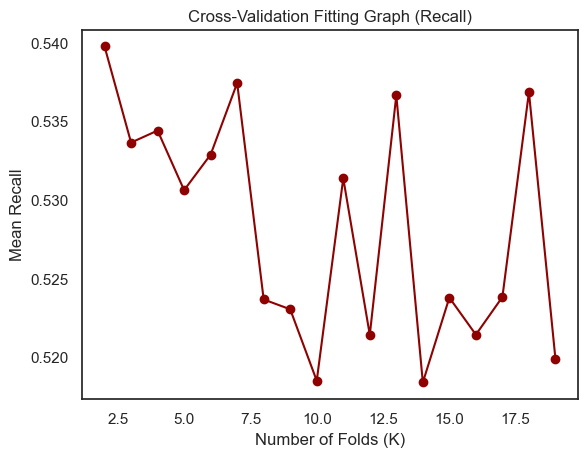

Best K value based on recall: 2


In [199]:
# Set up K values and performance tracking
k_values = np.arange(2, 20)
performance_scores = []
best_k = None  # Initialize variable to store the best K value
best_recall_score = -1  # Initialize variable to track the best recall score

# Iterate over K values
for k in k_values:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    model = xgb.XGBClassifier(eval_metric='logloss', objective='binary:logistic', random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='recall')
    mean_recall_score = np.mean(scores)
    performance_scores.append(mean_recall_score)

    if mean_recall_score > best_recall_score:
        best_k = k
        best_recall_score = mean_recall_score
        
plt.plot(k_values, performance_scores, marker='o')
plt.title('Cross-Validation Fitting Graph (Recall)')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean Recall')
plt.show()
print("Best K value based on recall:", best_k)

In [214]:
# Objective function with early stopping
def objective(params):
    params.update({key: int(value) if key in ('n_estimators', 'max_depth', 'min_child_weight') else value for key, value in params.items()})
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    xgb_model = xgb.XGBClassifier(**params, random_state=42, eval_metric='logloss', objective='binary:logistic', early_stopping_rounds=30)

    scores = []
    for train_index, test_index in skf.split(X_train, y_train):
        xgb_model.fit(X_train.iloc[train_index], y_train[train_index], eval_set=[(X_train.iloc[test_index], y_train[test_index])], verbose=False)
        scores.append(recall_score(y_train[test_index], xgb_model.predict(X_train.iloc[test_index])))
    
    mean_auc = np.mean(scores)
    std_auc = np.std(scores)
    loss = 1 - mean_auc

    print(f"Mean: {mean_auc:.4f}, Std: {std_auc:.4f}")

    return {'loss': loss, 'status': STATUS_OK, 'params': params}

# Hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

# Extract the best parameters
best_params = {key: int(value) if key in ('n_estimators', 'max_depth', 'min_child_weight') else value for key, value
               in best.items() if key not in ('loss', 'status')}
print("\nBest Parameters:", best_params)

Mean: 0.9893, Std: 0.0061                                                                                              
Mean: 0.9824, Std: 0.0099                                                                                              
Mean: 0.9924, Std: 0.0061                                                                                              
Mean: 0.9832, Std: 0.0107                                                                                              
Mean: 0.9908, Std: 0.0092                                                                                              
Mean: 0.9809, Std: 0.0130                                                                                              
Mean: 0.9931, Std: 0.0069                                                                                              
Mean: 0.9021, Std: 0.0291                                                                                              
Mean: 0.9121, Std: 0.0298               

In [215]:
def train_and_evaluate_with_cross_val(X_train, y_train, best_params):
    # Split the data into training and validation sets
    X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    xgb_model = xgb.XGBClassifier(**best_params, random_state=42, eval_metric='logloss', objective='binary:logistic')
    xgb_model.fit(X_train_val, y_train_val, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

    # Evaluate with Cross-Validation
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=101)
    cross_val_scores = cross_val_score(xgb_model, X_train, y_train, scoring='recall', cv=skf)
    mean_auc = np.mean(cross_val_scores)
    std_auc = np.std(cross_val_scores)

    print(f"Mean ROC AUC with Cross-Validation: {mean_auc:.4f}")
    print(f"Std Dev of ROC AUC with Cross-Validation: {std_auc:.4f}")

    return xgb_model, mean_auc, std_auc

train_and_evaluate_with_cross_val(X_train, y_train, best_params)

Mean ROC AUC with Cross-Validation: 0.9679
Std Dev of ROC AUC with Cross-Validation: 0.0076


(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.7124987782384538, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric='logloss', feature_types=None, gamma=7.0,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.10848073486816369,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=0, max_leaves=None,
               min_child_weight=9, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=750, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...),
 0.9678899082568807,
 0.007645259938837912)

In [216]:
# Initialize lists for classification metrics
metrics_train, metrics_val = [], []

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    X_train_val, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_val, y_val = y_train[train_index], y_train[val_index]

    xgb_model = xgb.XGBClassifier(**best_params, random_state=42, eval_metric='logloss', objective='binary:logistic')
    xgb_model.fit(X_train_val, y_train_val, eval_set=[(X_val, y_val)], verbose=False)
    train_pred = xgb_model.predict(X_train_val)  # Train set
    y_pred = xgb_model.predict(X_val)           # Validation set

    # Classification metric calculations
    train_metrics = (
        roc_auc_score(y_train_val, train_pred),
        recall_score(y_train_val, train_pred),
        accuracy_score(y_train_val, train_pred),
        precision_score(y_train_val, train_pred),
        f1_score(y_train_val, train_pred),
        # confusion_matrix(y_train_val, train_pred)
    )

    val_metrics = (
        roc_auc_score(y_val, y_pred),
        recall_score(y_val, y_pred),
        accuracy_score(y_val, y_pred),
        precision_score(y_val, y_pred),
        f1_score(y_val, y_pred),
        # confusion_matrix(y_val, y_pred)
    )

    # Append metrics to lists
    metrics_train.append(train_metrics)
    metrics_val.append(val_metrics)

# Calculate means of metrics for Training set
mean_metrics_train = np.mean(metrics_train, axis=0)

# Calculate means of metrics for Validation set
mean_metrics_val = np.mean(metrics_val, axis=0)

# Display evaluation metrics for Training set
print("\nTraining Set Metrics:")
print(f"Mean ROC AUC Train: {mean_metrics_train[0]:.4f}")
print(f"Mean Recall Train: {mean_metrics_train[1]:.4f}")
print(f"Mean Accuracy Train: {mean_metrics_train[2]:.4f}")
print(f"Mean Precision Train: {mean_metrics_train[3]:.4f}")
print(f"Mean F1 Score Train: {mean_metrics_train[4]:.4f}")
# print("Confusion Matrix Train:\n", mean_metrics_train[5])

# Display evaluation metrics for Validation set
print("\nValidation Set Metrics:")
print(f"Mean ROC AUC Val: {mean_metrics_val[0]:.4f}")
print(f"Mean Recall Val: {mean_metrics_val[1]:.4f}")
print(f"Mean Accuracy Val: {mean_metrics_val[2]:.4f}")
print(f"Mean Precision Val: {mean_metrics_val[3]:.4f}")
print(f"Mean F1 Score Val: {mean_metrics_val[4]:.4f}")
# print("Confusion Matrix Val:\n", mean_metrics_val[5])


Training Set Metrics:
Mean ROC AUC Train: 0.7338
Mean Recall Train: 1.0000
Mean Accuracy Train: 0.6089
Mean Precision Train: 0.4044
Mean F1 Score Train: 0.5759

Validation Set Metrics:
Mean ROC AUC Val: 0.6950
Mean Recall Val: 0.9511
Mean Accuracy Val: 0.5748
Mean Precision Val: 0.3806
Mean F1 Score Val: 0.5432


In [217]:
# Evaluate the model
y_pred = xgb_model.predict(X_test)

print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('F2 Score:', fbeta_score(y_test, y_pred, beta=2))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

ROC AUC Score: 0.6966303039491335
Recall Score: 0.928698752228164
Accuracy Score: 0.587789872219593
Precision Score: 0.3853550295857988
F1 Score: 0.5446941975953998
F2 Score: 0.7244160177975528

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62      1552
           1       0.39      0.93      0.54       561

    accuracy                           0.59      2113
   macro avg       0.67      0.70      0.58      2113
weighted avg       0.80      0.59      0.60      2113



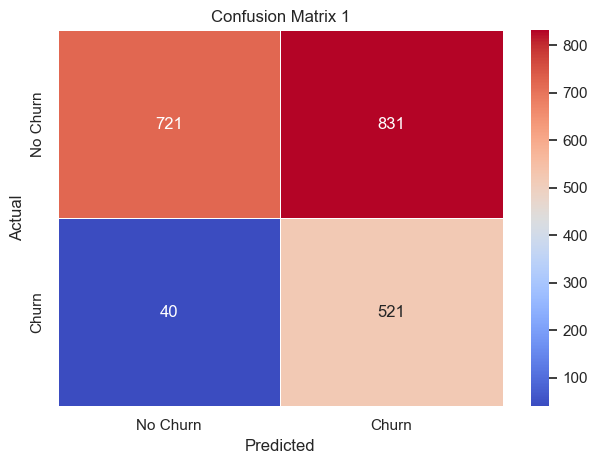

In [224]:
cm_xgb = confusion_matrix(y_test, y_pred)
labels = ['No Churn', 'Churn']
cm_df_xgb = pd.DataFrame(cm_xgb, index=labels, columns=labels)
fig, ax = plt.subplots()
sns.heatmap(cm_df_xgb, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=0.5, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix 1')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.tight_layout()
plt.savefig('conf_mat1.jpg')
plt.show()

In [225]:
# Save the model using joblib
from joblib import dump, load
model_filename = 'model_ohe_recall.joblib'
dump(xgb_model, model_filename)

['model_ohe_recall.joblib']